<a href="https://colab.research.google.com/github/shandarmodabbir/Handwritten-Digit-Recognition/blob/main/Handwritten%20Digit%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


((x_train, y_train), (x_test, y_test))= mnist.load_data()


print(x_train.shape, y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 10


model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs= epochs, verbose = 1, validation_data=(x_test,y_test))
print('the model has sucessfully trained')
model.save('mnist.h5')
print('saving the model')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.1345 - loss: 2.2894 - val_accuracy: 0.3163 - val_loss: 2.2443
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.2658 - loss: 2.2377 - val_accuracy: 0.5194 - val_loss: 2.1767
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.3841 - loss: 2.1728 - val_accuracy: 0.6374 - val_loss: 2.0794
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4865 - loss: 2.0732 - val_accuracy: 0.6962 - val_loss: 1.9358
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5575 - loss: 1.9296 - val_accuracy: 0.7369 - val_loss: 1.7333
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6074 - loss: 1.7344 - val_accuracy: 0.7692 - val_loss: 1.4794
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6521 - loss: 1.5037 - val_accuracy: 0.7959 - val_loss: 1.2168
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6814 - loss: 1.2829 - val_accuracy:

the model has sucessfully trained
saving the model


In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('test loss', score[0])
print('test accuracy', score[1])

test loss 0.7244571447372437
test accuracy 0.8406000137329102


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


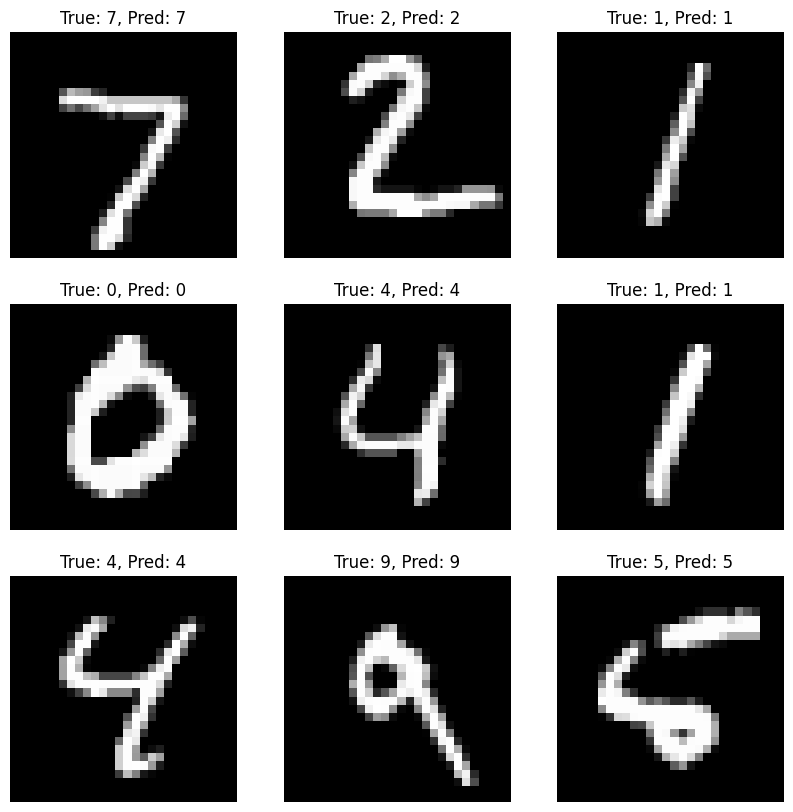

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize some predictions
def plot_predictions(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {np.argmax(labels[i])}, Pred: {predictions[i]}')
        plt.axis('off')
    plt.show()

plot_predictions(x_test, y_test, predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


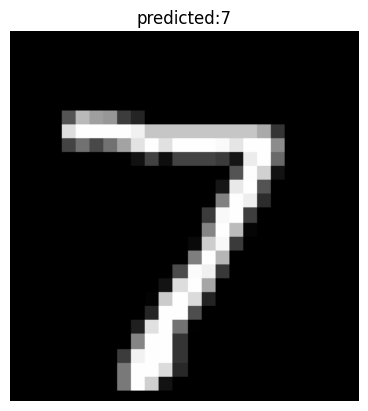

In [ ]:
from keras.models import load_model
from PIL import Image

def preprocess_img(img_path):
  img = Image.open(img_path)
  img = img.resize((28,28))
  img = img.convert('L')
  img = np.array(img)
  img = img / 255.0
  img = img.reshape((1,28,28,1))
  return img

def predict_digit(img_path):
  img = preprocess_img(img_path)
  res = model.predict(img)
  digit = np.argmax(res)
  confidence = np.max(res)
  return digit, confidence

image_path = '/content/drive/MyDrive/Colab Notebooks/71.png'
predicted_digit, confidence = predict_digit(image_path)


img = Image.open(image_path)
plt.imshow(img, cmap = 'gray')
plt.title(f'predicted:{predicted_digit}')
plt.axis('off')
plt.show()